<a href="https://colab.research.google.com/github/DeepCodeSec/ml1000-p3/blob/milestone3code/notebooks/group_1_project_rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 1 Project

In [ ]:
#@title Data Source
datafile = "./data-sample-clean-20K.csv" #@param {type:"string"}

In [ ]:
import pandas as pd

# Load the pre-processed data into the df_features dataframe
df = pd.read_csv(datafile, sep=',')
print(f"Dataset '{datafile}' contains {df.shape[0]} row(s) and {df.shape[1]} column(s).")

Dataset './data-sample-clean-20K.csv' contains 7171 row(s) and 274 column(s).


## 1. Classification without PyCaret

In [ ]:
# Make a copy of the dataset
df_without_pycaret = df.copy()

In [ ]:
df_without_pycaret.describe()

,img_count,has_form,has_login_form,has_js,js_include_b64,nb_tokens,nb_title_entities,nb_text_entities,bank_of_america,wells_fargo,...,unt sign,unt sign privacy,username password,username password webmail,view shared,view shared file,webmail login,webmail mini,webmail service,webmail welcome
count,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,...,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000
mean,3.140148,0.752754,0.746758,0.857900,0.008646,25.724306,0.170548,1.303584,0.001534,0.000837,...,0.031097,0.031097,0.100683,0.048529,0.030540,0.029982,0.041417,0.047134,0.022870,0.029842
std,6.638001,0.431441,0.434899,0.349177,0.092587,14.853614,0.384211,1.332676,0.039138,0.028916,...,0.173593,0.173593,0.316295,0.214896,0.172079,0.170549,0.200661,0.211941,0.157672,0.171796
min,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,0.000000,21.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,1.000000,0.000000,34.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,230.000000,1.000000,1.000000,1.000000,1.000000,70.000000,2.000000,15.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000


In [ ]:
df_without_pycaret.isnull().sum()

title_clean         0
img_count           0
has_form            0
has_login_form      0
has_js              0
                   ..
view shared file    0
webmail login       0
webmail mini        0
webmail service     0
webmail welcome     0
Length: 274, dtype: int64

In [ ]:
df_without_pycaret

,title_clean,img_count,has_form,has_login_form,has_js,js_include_b64,nb_tokens,text_clean,classification,nb_title_entities,...,unt sign,unt sign privacy,username password,username password webmail,view shared,view shared file,webmail login,webmail mini,webmail service,webmail welcome
0,one drive,1,0,0,1,0,31,one drive read document please choose email pr...,malicious,0.0,...,0,0,0,0,1,1,0,0,0,0
1,email security : : user account,0,1,1,1,0,19,email security user account verification neede...,malicious,0.0,...,0,0,0,0,0,0,0,0,0,0
2,sign in to your account,4,1,1,0,0,14,sign account nobody mycraftmail.com enter pass...,malicious,0.0,...,0,0,0,0,0,0,0,0,0,0
3,worldclient,2,1,1,1,0,13,worldclient microsoft office verification port...,malicious,0.0,...,0,0,0,0,0,0,0,0,0,0
4,plantronics manager,0,1,1,1,0,18,plantronics manager 2019 plantronics inc. righ...,malicious,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7166,safeway wine & spirit and sobeys liquor - prin...,1,1,0,1,0,7,safeway wine spirit sobeys liquor print coupon,benign,0.0,...,0,0,0,0,0,0,0,0,0,0
7167,update email address,2,0,0,0,0,36,update email address hello thanks taking time ...,benign,0.0,...,0,0,0,0,0,0,0,0,0,0
7168,"educalingo , the dictionary for curious people",144,0,0,1,0,23,educalingo dictionary curious people search c ...,benign,0.0,...,0,0,0,0,0,0,0,0,0,0
7169,my - yahoo ! -,2,1,0,1,0,23,yahoo yahoo yahoo japan lowya paypay lowya pay...,benign,0.0,...,0,0,0,0,0,0,0,0,0,0


### Required Imports and methods

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import classification_report

def run_svm(clf, x_train, y_train, x_test, y_test):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)

  print()
  print('classification_report')
  print(classification_report(y_test, y_pred))

In [ ]:
# Handling Non-Numerical Data for Machine Learning
# https://pythonprogramming.net/working-with-non-numerical-data-machine-learning-tutorial/

import numpy as np

def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

In [ ]:
train_sizes = [1, 100, 200, 500, 1000, 2000, 3000, 4000, 5000, 5736]

In [ ]:
### Bundling our previous work into a function ###
def learning_curves(estimator, features, target, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, 
    features, 
    target, 
    train_sizes = train_sizes,
    cv = cv, 
    scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,0.4)

### Plotting the two learning curves ###

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsRegressor

plt.figure(figsize = (16,5))

<Figure size 1600x500 with 0 Axes>

<Figure size 1600x500 with 0 Axes>

### Balance the Data

Text(0, 0.5, 'Count')

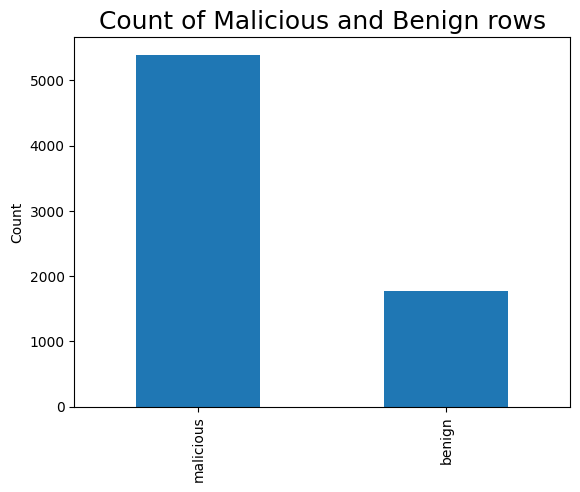

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_without_pycaret['classification'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of Malicious and Benign rows", fontsize=18)
plt.ylabel("Count")

#### Resampling strategies for imbalanced datasets

In [ ]:
# Class count
count_class_0, count_class_1 = df_without_pycaret.classification.value_counts()

# Divide by class
df_class_0 = df_without_pycaret[df_without_pycaret['classification'] == 'malicious']
df_class_1 = df_without_pycaret[df_without_pycaret['classification'] == 'benign']

#### Random over-sampling

Random over-sampling:
malicious    5396
benign       5396
Name: classification, dtype: int64


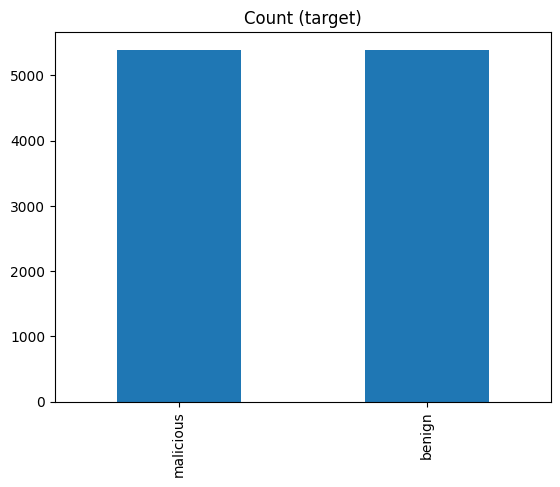

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.classification.value_counts())

df_test_over.classification.value_counts().plot(kind='bar', title='Count (target)');

### Convert non-numeric features to numeric

In [ ]:
# Convert classification to numeric (malicious = 1, benign = 0)
df_without_pycaret['classification'] = df_without_pycaret['classification'].map({'benign':0,'malicious':1})
df_without_pycaret.head()

,title_clean,img_count,has_form,has_login_form,has_js,js_include_b64,nb_tokens,text_clean,classification,nb_title_entities,...,unt sign,unt sign privacy,username password,username password webmail,view shared,view shared file,webmail login,webmail mini,webmail service,webmail welcome
0,one drive,1,0,0,1,0,31,one drive read document please choose email pr...,1,0.0,...,0,0,0,0,1,1,0,0,0,0
1,email security : : user account,0,1,1,1,0,19,email security user account verification neede...,1,0.0,...,0,0,0,0,0,0,0,0,0,0
2,sign in to your account,4,1,1,0,0,14,sign account nobody mycraftmail.com enter pass...,1,0.0,...,0,0,0,0,0,0,0,0,0,0
3,worldclient,2,1,1,1,0,13,worldclient microsoft office verification port...,1,0.0,...,0,0,0,0,0,0,0,0,0,0
4,plantronics manager,0,1,1,1,0,18,plantronics manager 2019 plantronics inc. righ...,1,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Convert non-numerical data to numeric
df_without_pycaret = handle_non_numerical_data(df_without_pycaret)
print(df_without_pycaret.head())

   title_clean  img_count  has_form  has_login_form  has_js  js_include_b64  \
0          779          1         0               0       1               0   
1          149          0         1               1       1               0   
2          201          4         1               1       0               0   
3          681          2         1               1       1               0   
4          166          0         1               1       1               0   

   nb_tokens  text_clean  classification  nb_title_entities  ...  unt sign  \
0         31        1440               1                0.0  ...         0   
1         19         832               1                0.0  ...         0   
2         14         503               1                0.0  ...         0   
3         13        2156               1                0.0  ...         0   
4         18         692               1                0.0  ...         0   

   unt sign privacy  username password  username passwor

### Classification with Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from numpy import *
import time

# Split the dataframe into feature and target variables
X = df_without_pycaret.drop('classification', axis=1) 
y = df_without_pycaret['classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a RandomForestClassifier model
random.seed(1234)
rf = RandomForestClassifier()

# Train the model
t0 = time.time()
rf.fit(X_train, y_train)
print("Original Model")
print("Training time:", time.time() - t0)

# Predict Class Probabilities
y_rf_proba = rf.predict_proba(X_test)
y_rf_pred = np.where(y_rf_proba[:,1] > 0.5, 1, 0)

# Predict the classes for testing data
y_pred = rf.predict(X_test)

# Evaluate the model's performance
print("Training Accuracy :", rf.score(X_train, y_train))
print("Validation Accuracy :", rf.score(X_test, y_test))

# We create a second rf model to validate if we can replicate results
validate_rf = RandomForestClassifier(random_state = random.seed(1234))

# Train the model
t2 = time.time()
validate_rf.fit(X_train, y_train)
print("\nValidation Model")
print("Training time:", time.time() - t2)

# Evaluate the model's performance
print("Training Accuracy :", validate_rf.score(X_train, y_train))
print("Validation Accuracy :", validate_rf.score(X_test, y_test))

Original Model
Training time: 1.162381887435913
Training Accuracy : 0.9776847977684798
Validation Accuracy : 0.9421602787456446

Validation Model
Training time: 1.1783668994903564
Training Accuracy : 0.9776847977684798
Validation Accuracy : 0.9421602787456446


#### Visualize individual decision tress from a random forest.

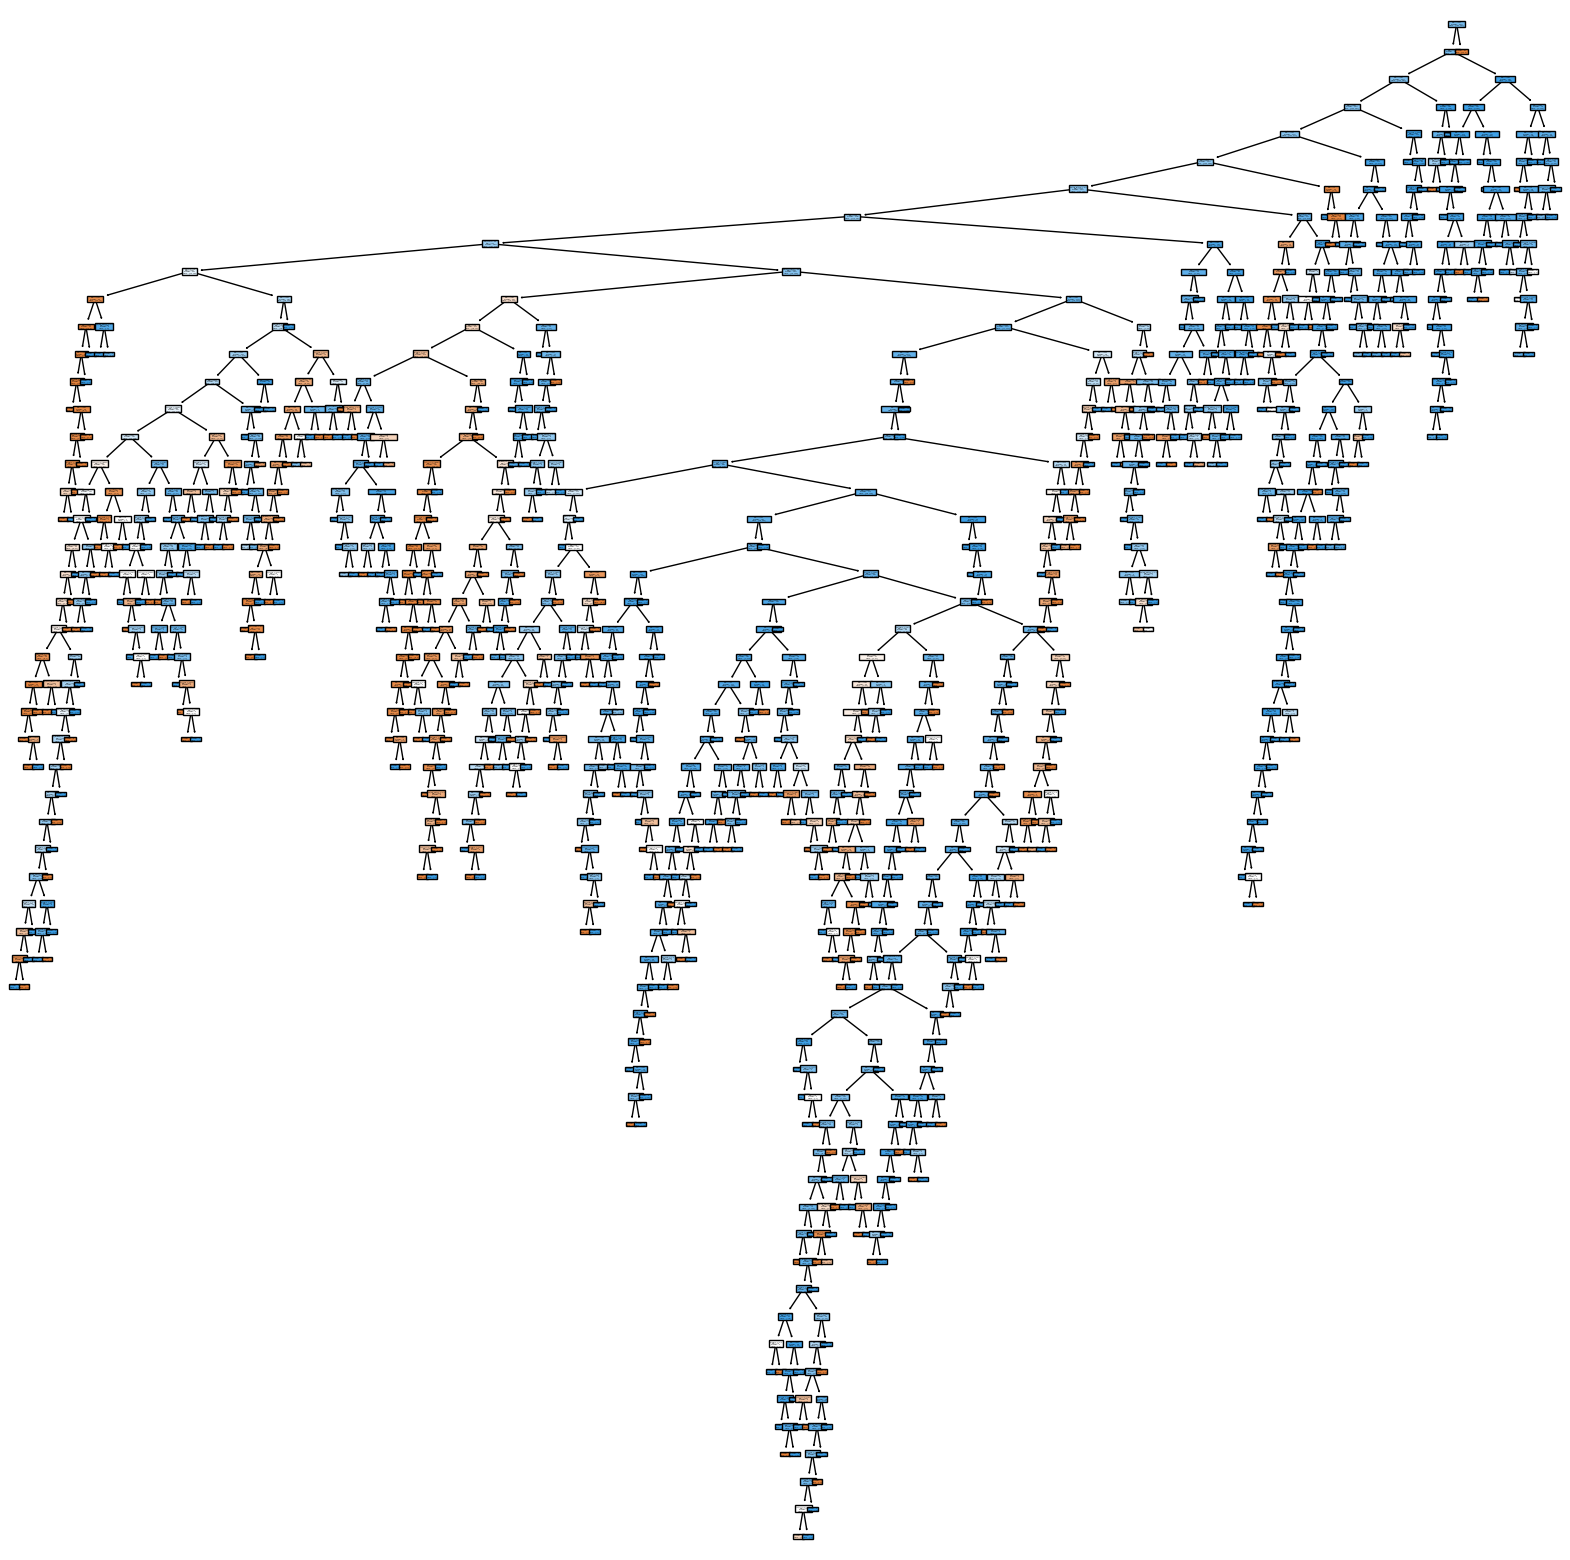

In [ ]:
from sklearn import tree

plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)

#### Get feature importance

Summary of Feature Importance:
title_clean: Score: 0.07474
img_count: Score: 0.06721
has_form: Score: 0.02923
has_login_form: Score: 0.13432
has_js: Score: 0.00953
js_include_b64: Score: 0.00094
nb_tokens: Score: 0.07867
text_clean: Score: 0.08517
nb_title_entities: Score: 0.01281
nb_text_entities: Score: 0.03188
bank_of_america: Score: 0.00033
wells_fargo: Score: 0.00059
citibank: Score: 0.00000
apple: Score: 0.00273
microsoft: Score: 0.00778
amazon: Score: 0.00248
google: Score: 0.00410
facebook: Score: 0.00064
dhl: Score: 0.00000
youtube: Score: 0.00000
whatsapp: Score: 0.00005
linkedin: Score: 0.00017
twitter: Score: 0.00028
access account: Score: 0.00274
account account: Score: 0.00093
account account create: Score: 0.00026
account another: Score: 0.00019
account another account: Score: 0.00017
account create: Score: 0.00408
account create one: Score: 0.00103
account doe: Score: 0.00091
account doe n: Score: 0.00132
account enter: Score: 0.00029
account enter password: Score: 0.00

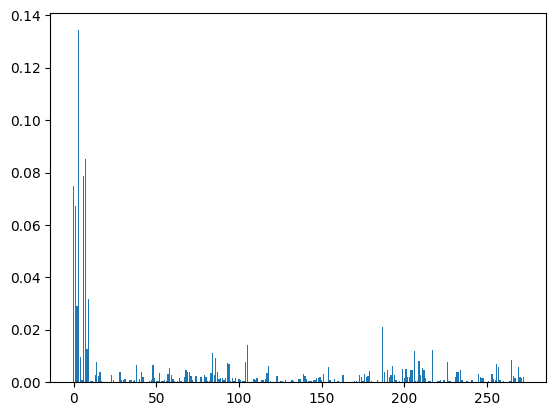

In [ ]:
# get importance
importance = rf.feature_importances_

# summarize feature importance
print('Summary of Feature Importance:')
for i,v in enumerate(importance):
 print(rf.feature_names_in_[i] + ': Score: %.5f' % (v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Cross Validation
Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern.

We are using k-fold cross-validation method to perform cross-validation. In k-fold cross-validation, you split the input data into k subsets of data (also known as folds). You train an ML model on all but one (k-1) of the subsets, and then evaluate the model on the subset that was not used for training. This process is repeated k times, with a different subset reserved for evaluation (and excluded from training) each time.

In [ ]:
# Cross Validation
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition: Accuracy = Number of correct predictions Total number of predictions.

In [ ]:
# Cross Validation Classification Accuracy
scoring = 'accuracy'
results = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.938 (0.004)


Log-loss is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification). The more the predicted probability diverges from the actual value, the higher is the log-loss value.

In [ ]:
# Cross Validation Classification LogLoss
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.344 (0.073)


AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1).

In [ ]:
# Cross Validation Classification ROC AUC
scoring = 'roc_auc'
results = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.967 (0.006)


The Mean Absolute refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

In [ ]:
# Cross Validation Regression MAE
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -0.062 (0.004)


The Mean Squared Error (MSE) is defined as Mean or Average of the square of the difference between actual and estimated values.

In [ ]:
# Cross Validation Regression MSE
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -0.062 (0.005)


R-squared is a statistical measure that represents the goodness of fit of a regression model. 

In [ ]:
# Cross Validation Regression R-squared
scoring = 'r2'
results = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring=scoring)
print("R2: %.3f (%.3f)" % (results.mean(), results.std()))

R2: 0.664 (0.018)


#### Benchmarking

In [ ]:
run_svm(rf, X_train, y_train, X_test, y_test)


classification_report
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       348
           1       0.96      0.96      0.96      1087

    accuracy                           0.94      1435
   macro avg       0.92      0.92      0.92      1435
weighted avg       0.94      0.94      0.94      1435



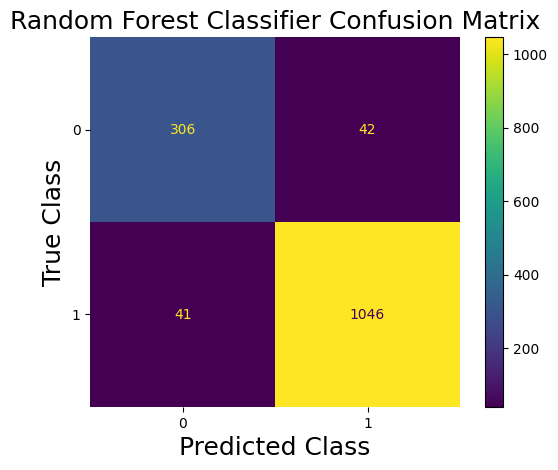

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.axis()
plt.grid(False)
plt.box(False)
plt.xlabel('Predicted Class', fontsize=18)
plt.ylabel('True Class', fontsize=18)
plt.title('Random Forest Classifier Confusion Matrix', fontsize=18)
plt.show()

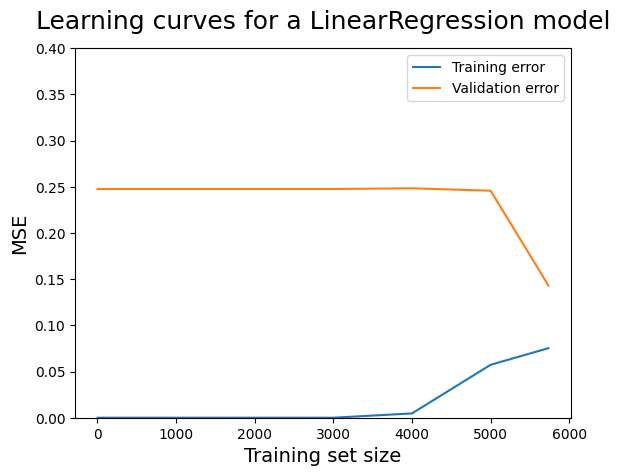

In [ ]:
learning_curves(LinearRegression(), X, y, train_sizes, 5)

<Axes: title={'center': 'ROC Plot for Random Forest'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

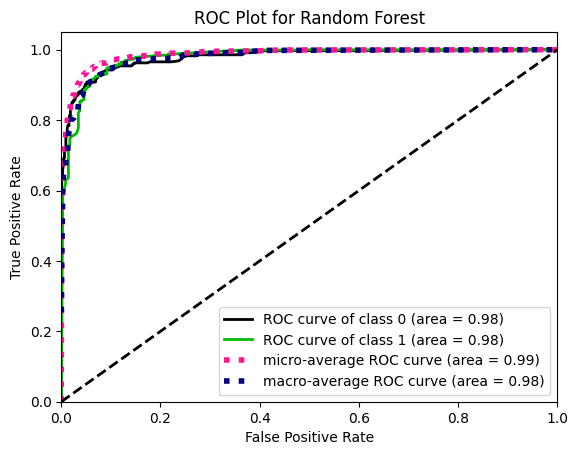

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_roc(y_test, y_rf_proba, title = 'ROC Plot for Random Forest')

<Axes: title={'center': 'PR Curve for Random Forest'}, xlabel='Recall', ylabel='Precision'>

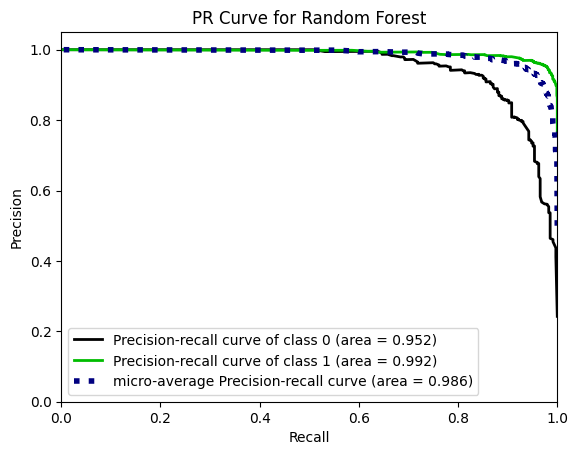

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_rf_proba, title = 'PR Curve for Random Forest')

<Axes: title={'center': 'Cumulative Gains Chart for Random Forest'}, xlabel='Percentage of sample', ylabel='Gain'>

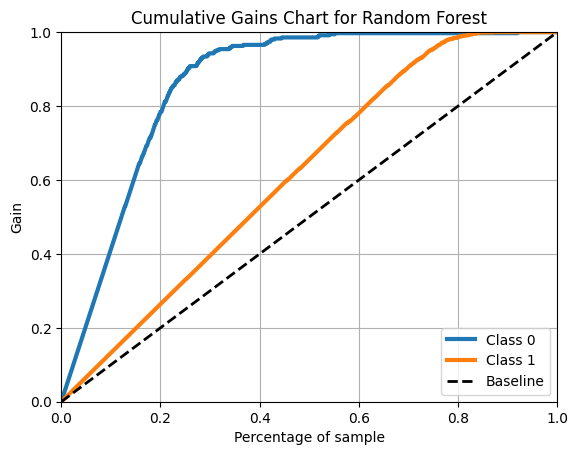

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test, y_rf_proba, title = 'Cumulative Gains Chart for Random Forest')

<Axes: title={'center': 'Lift Curve for Random Forest'}, xlabel='Percentage of sample', ylabel='Lift'>

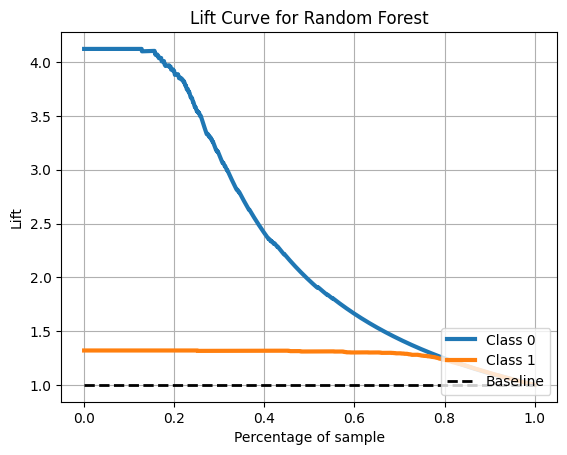

In [ ]:
skplt.metrics.plot_lift_curve(y_test, y_rf_proba, title = 'Lift Curve for Random Forest')

Log Loss 
how close the prediction probability is to its corresponding value in binary classification. If the predicted probablity diverges far from the actual then the log-loss value is higher.  

In [ ]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, rf.predict_proba(X_test))
logloss

0.16930876274772236

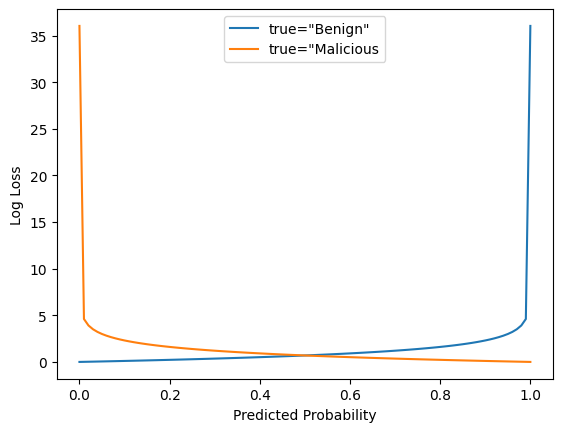

In [ ]:
# predictions as 0 to 1 in 0.01 increments
yhat = [x*0.01 for x in range(0, 101)]

# evaluate predictions for a 0 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in yhat]

# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in yhat]

# plot input to loss
plt.plot(yhat, losses_0, label='true="Benign"')
plt.plot(yhat, losses_1, label='true="Malicious')
plt.xlabel('Predicted Probability')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

### Feature Reduction
We exclude all features lower than 0.01 importance. By doing so, we have reduced the number of features from 273 to 16.

The remaining features are:

*   title_clean
*   img_count
*   has_form
*   has_login_form
*   has_js
*   nb_tokens
*   text_clean
*   nb_title_entities
*   nb_text_entities
*   account sign
*   email address
*   forgot password
*   password remember
*   phone email
*   privacy cooky
*   right reserved


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time

# Split the dataframe into feature and target variables
X = df_without_pycaret[['title_clean', 'img_count', 'has_form', 'has_login_form', 'has_js', 'nb_tokens', 'text_clean', 'nb_title_entities', 'nb_text_entities', 'account sign', 'email address', 'forgot password', 'password remember', 'phone email', 'privacy cooky', 'right reserved']]
y = df_without_pycaret['classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a RandomForestClassifier
rf = RandomForestClassifier(random_state = random.seed(1234))

# Train the model
t0 = time.time()
rf.fit(X_train, y_train)
print("Training time:", time.time() - t0)

# Evaluate the model's performance
print("Training Accuracy :", rf.score(X_train, y_train))
print("Validation Accuracy :", rf.score(X_test, y_test))

Training time: 0.611194372177124
Training Accuracy : 0.9776847977684798
Validation Accuracy : 0.9393728222996516


### Hyperparameter Tuning
We followed the method described by WIll Koehrsen
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74.

We performed the following steps:

1.   Use RandomizedSearchCV to get an approximation of the optimal parameters.
2.   Use GridSearchCV to narrow get the optimal parameters.



#### Random Search Cross Validation
Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

We will try adjusting the following set of hyperparameters:
*   **n_estimators** = number of trees in the foreset
*   **max_features** = max number of features considered for splitting a node
*   **max_depth** = max number of levels in each decision tree
*   **min_samples_split** = min number of data points placed in a node before the node is split
*   **min_samples_leaf** = min number of data points allowed in a leaf node
*   **bootstrap** = method for sampling data points (with or without replacement)

#### Random Hyperparameter Grid
To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


#### Random Search Training
We are selecting at random to sample a wide range of values.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

#### View the best parameters from fitting the random search

In [ ]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

#### Create a model with best parameters from Random Search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time

# Create a RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=600,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=110,
    bootstrap=False)

# Train the model
t0 = time.time()
rf.fit(X_train, y_train)
print("Training time:", time.time() - t0)

# Evaluate the model's performance
print("Training Accuracy :", rf.score(X_train, y_train))
print("Validation Accuracy :", rf.score(X_test, y_test))

Training time: 4.087085008621216
Training Accuracy : 0.9701882845188284
Validation Accuracy : 0.9463414634146341


#### Perform GridSearchCV
Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Create a RandomForestClassifier model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [50, 60, 70, 100, 120],
    'min_samples_leaf': [3, 4, 5],
    'n_estimators': [200, 300, 400, 600, 800, 1000]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv=3,
                           n_jobs=-1, 
                           verbose=1, 
                           scoring="accuracy")

# Train the model
grid_search.fit(X_train, y_train)

grid_search.best_score_

rf_best = grid_search.best_estimator_
rf_best

Fitting 3 folds for each of 90 candidates, totalling 270 fits


RandomForestClassifier(max_depth=50, min_samples_leaf=3, n_estimators=300,
                       n_jobs=-1, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time

# Create a RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=300,
    min_samples_leaf=3,
    max_depth=50)

# Train the model
t0 = time.time()
rf.fit(X_train, y_train)
print("Training time:", time.time() - t0)

# Predict Class Probabilities
y_rf_proba = rf.predict_proba(X_test)
y_rf_pred = np.where(y_rf_proba[:,1] > 0.5, 1, 0)

# Predict the classes for testing data
y_pred = rf.predict(X_test)

# Evaluate the model's performance
print("Training Accuracy :", rf.score(X_train, y_train))
print("Validation Accuracy :", rf.score(X_test, y_test))

Training time: 1.6788387298583984
Training Accuracy : 0.9480474198047419
Validation Accuracy : 0.9484320557491289


#### Cross Validation
Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern.

We are using k-fold cross-validation method to perform cross-validation. In k-fold cross-validation, you split the input data into k subsets of data (also known as folds). You train an ML model on all but one (k-1) of the subsets, and then evaluate the model on the subset that was not used for training. This process is repeated k times, with a different subset reserved for evaluation (and excluded from training) each time.

In [ ]:
# Cross Validation
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition: Accuracy = Number of correct predictions Total number of predictions.

In [ ]:
# Cross Validation Classification Accuracy
scoring = 'accuracy'
results = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.935 (0.008)


Log-loss is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification). The more the predicted probability diverges from the actual value, the higher is the log-loss value.

In [ ]:
# Cross Validation Classification LogLoss
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.195 (0.015)


AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1).

In [ ]:
# Cross Validation Classification ROC AUC
scoring = 'roc_auc'
results = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.964 (0.007)


The Mean Absolute refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

In [ ]:
# Cross Validation Regression MAE
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -0.065 (0.008)


The Mean Squared Error (MSE) is defined as Mean or Average of the square of the difference between actual and estimated values.

In [ ]:
# Cross Validation Regression MSE
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -0.065 (0.009)


R-squared is a statistical measure that represents the goodness of fit of a regression model. 

In [ ]:
# Cross Validation Regression R-squared
scoring = 'r2'
results = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring=scoring)
print("R2: %.3f (%.3f)" % (results.mean(), results.std()))

R2: 0.654 (0.034)


#### Benchmarking

In [ ]:
run_svm(rf, X_train, y_train, X_test, y_test)


classification_report
              precision    recall  f1-score   support

           0       0.91      0.84      0.88       348
           1       0.95      0.97      0.96      1087

    accuracy                           0.94      1435
   macro avg       0.93      0.91      0.92      1435
weighted avg       0.94      0.94      0.94      1435



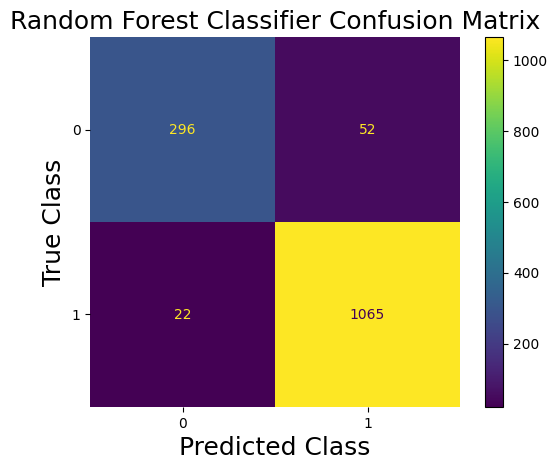

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.axis()
plt.grid(False)
plt.box(False)
plt.xlabel('Predicted Class', fontsize=18)
plt.ylabel('True Class', fontsize=18)
plt.title('Random Forest Classifier Confusion Matrix', fontsize=18)
plt.show()

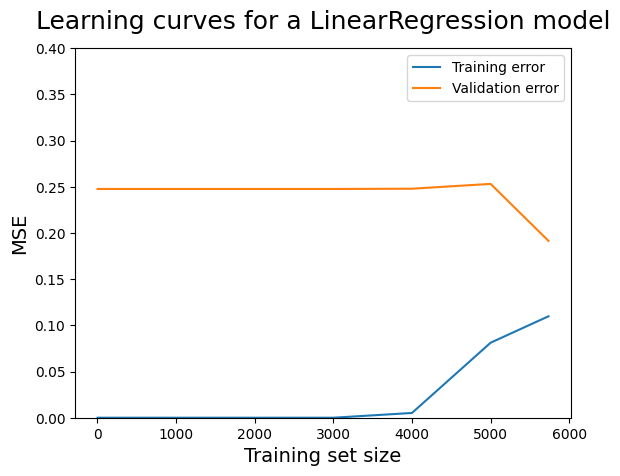

In [ ]:
learning_curves(LinearRegression(), X, y, train_sizes, 5)

<Axes: title={'center': 'ROC Plot for Random Forest'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

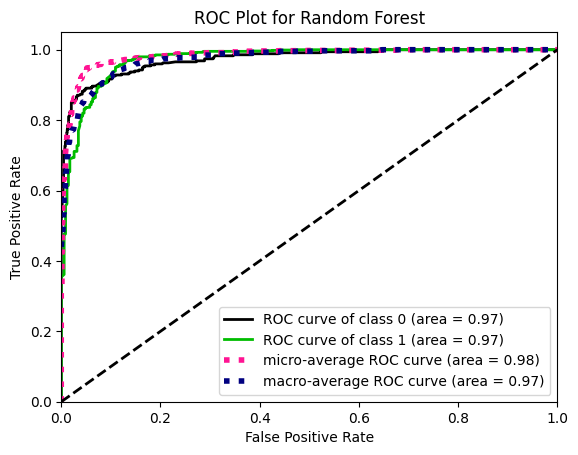

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_roc(y_test, y_rf_proba, title = 'ROC Plot for Random Forest')

<Axes: title={'center': 'PR Curve for Random Forest'}, xlabel='Recall', ylabel='Precision'>

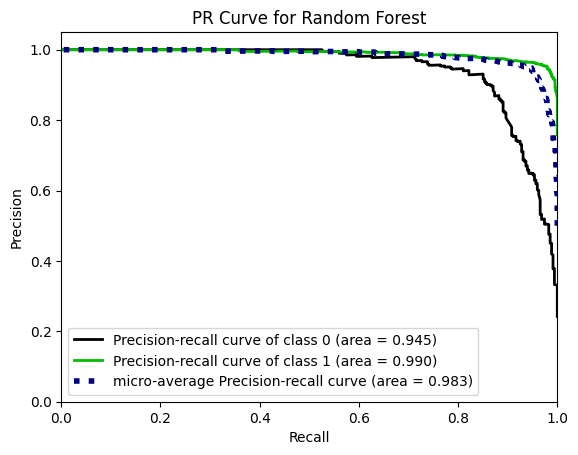

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_rf_proba, title = 'PR Curve for Random Forest')

<Axes: title={'center': 'Cumulative Gains Chart for Random Forest'}, xlabel='Percentage of sample', ylabel='Gain'>

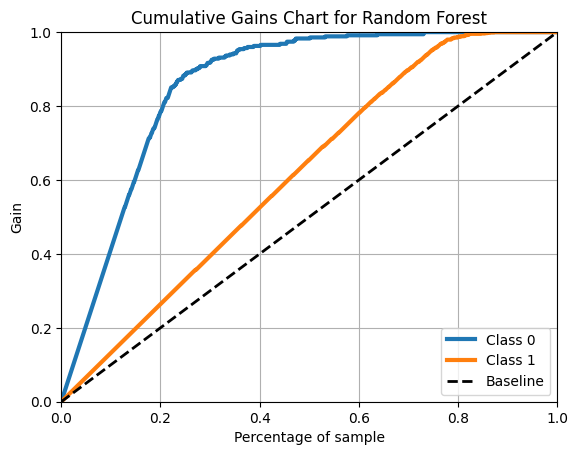

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test, y_rf_proba, title = 'Cumulative Gains Chart for Random Forest')

<Axes: title={'center': 'Lift Curve for Random Forest'}, xlabel='Percentage of sample', ylabel='Lift'>

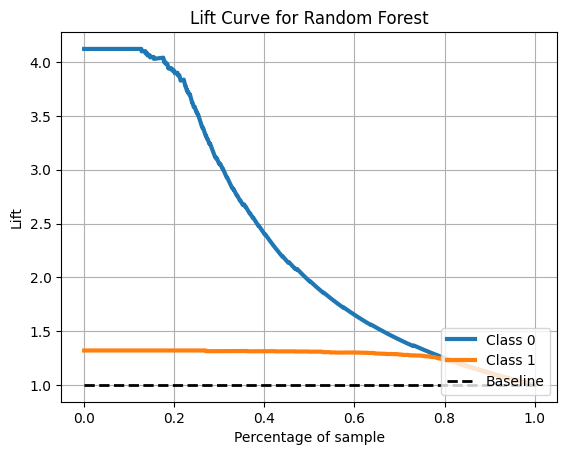

In [ ]:
skplt.metrics.plot_lift_curve(y_test, y_rf_proba, title = 'Lift Curve for Random Forest')

Log Loss 
how close the prediction probability is to its corresponding value in binary classification. If the predicted probablity diverges far from the actual then the log-loss value is higher.  

In [ ]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, rf.predict_proba(X_test))
logloss

0.176331551711164

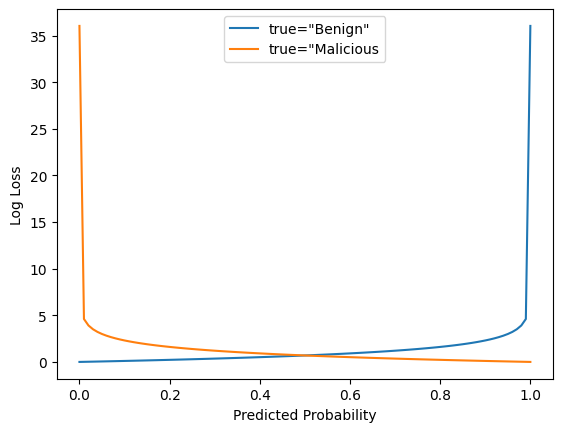

In [ ]:
# predictions as 0 to 1 in 0.01 increments
yhat = [x*0.01 for x in range(0, 101)]

# evaluate predictions for a 0 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in yhat]

# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in yhat]

# plot input to loss
plt.plot(yhat, losses_0, label='true="Benign"')
plt.plot(yhat, losses_1, label='true="Malicious')
plt.xlabel('Predicted Probability')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

### Random forest interpretation

In [ ]:
!pip install treeinterpreter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
instances = X_test.loc[[735]]
instances

,title_clean,img_count,has_form,has_login_form,has_js,nb_tokens,text_clean,nb_title_entities,nb_text_entities,account sign,email address,forgot password,password remember,phone email,privacy cooky,right reserved
735,349,3,1,1,1,17,1646,0.0,0.0,0,0,1,0,0,1,0


In [ ]:
rf_prediction, rf_bias, rf_contributions = ti.predict(dt, instances)

In [ ]:
rf_ft_list = []
for i in range(len(instances)):
    #print("Instance", i)
    print("Bias (trainset mean)", rf_bias[i])

    #print("Feature contributions:")
    for c, feature in sorted(zip(rf_contributions[i], 
                                 X.columns), 
                             key=lambda x: -abs(x[0])):
       rf_ft_list.append((feature, round(c, 2)))
    print("-"*50)

Bias (trainset mean) 0.7512203626220363
--------------------------------------------------


In [ ]:
rf_labels, rf_values = zip(*rf_ft_list)

In [ ]:
rf_ft_list

[('has_login_form', 0.11),
 ('text_clean', 0.08),
 ('password remember', 0.05),
 ('privacy cooky', 0.02),
 ('img_count', -0.01),
 ('nb_tokens', -0.01),
 ('right reserved', 0.01),
 ('title_clean', 0.01),
 ('nb_title_entities', 0.0),
 ('forgot password', 0.0),
 ('has_form', 0.0),
 ('has_js', 0.0),
 ('nb_text_entities', 0.0),
 ('account sign', 0.0),
 ('email address', 0.0),
 ('phone email', 0.0)]

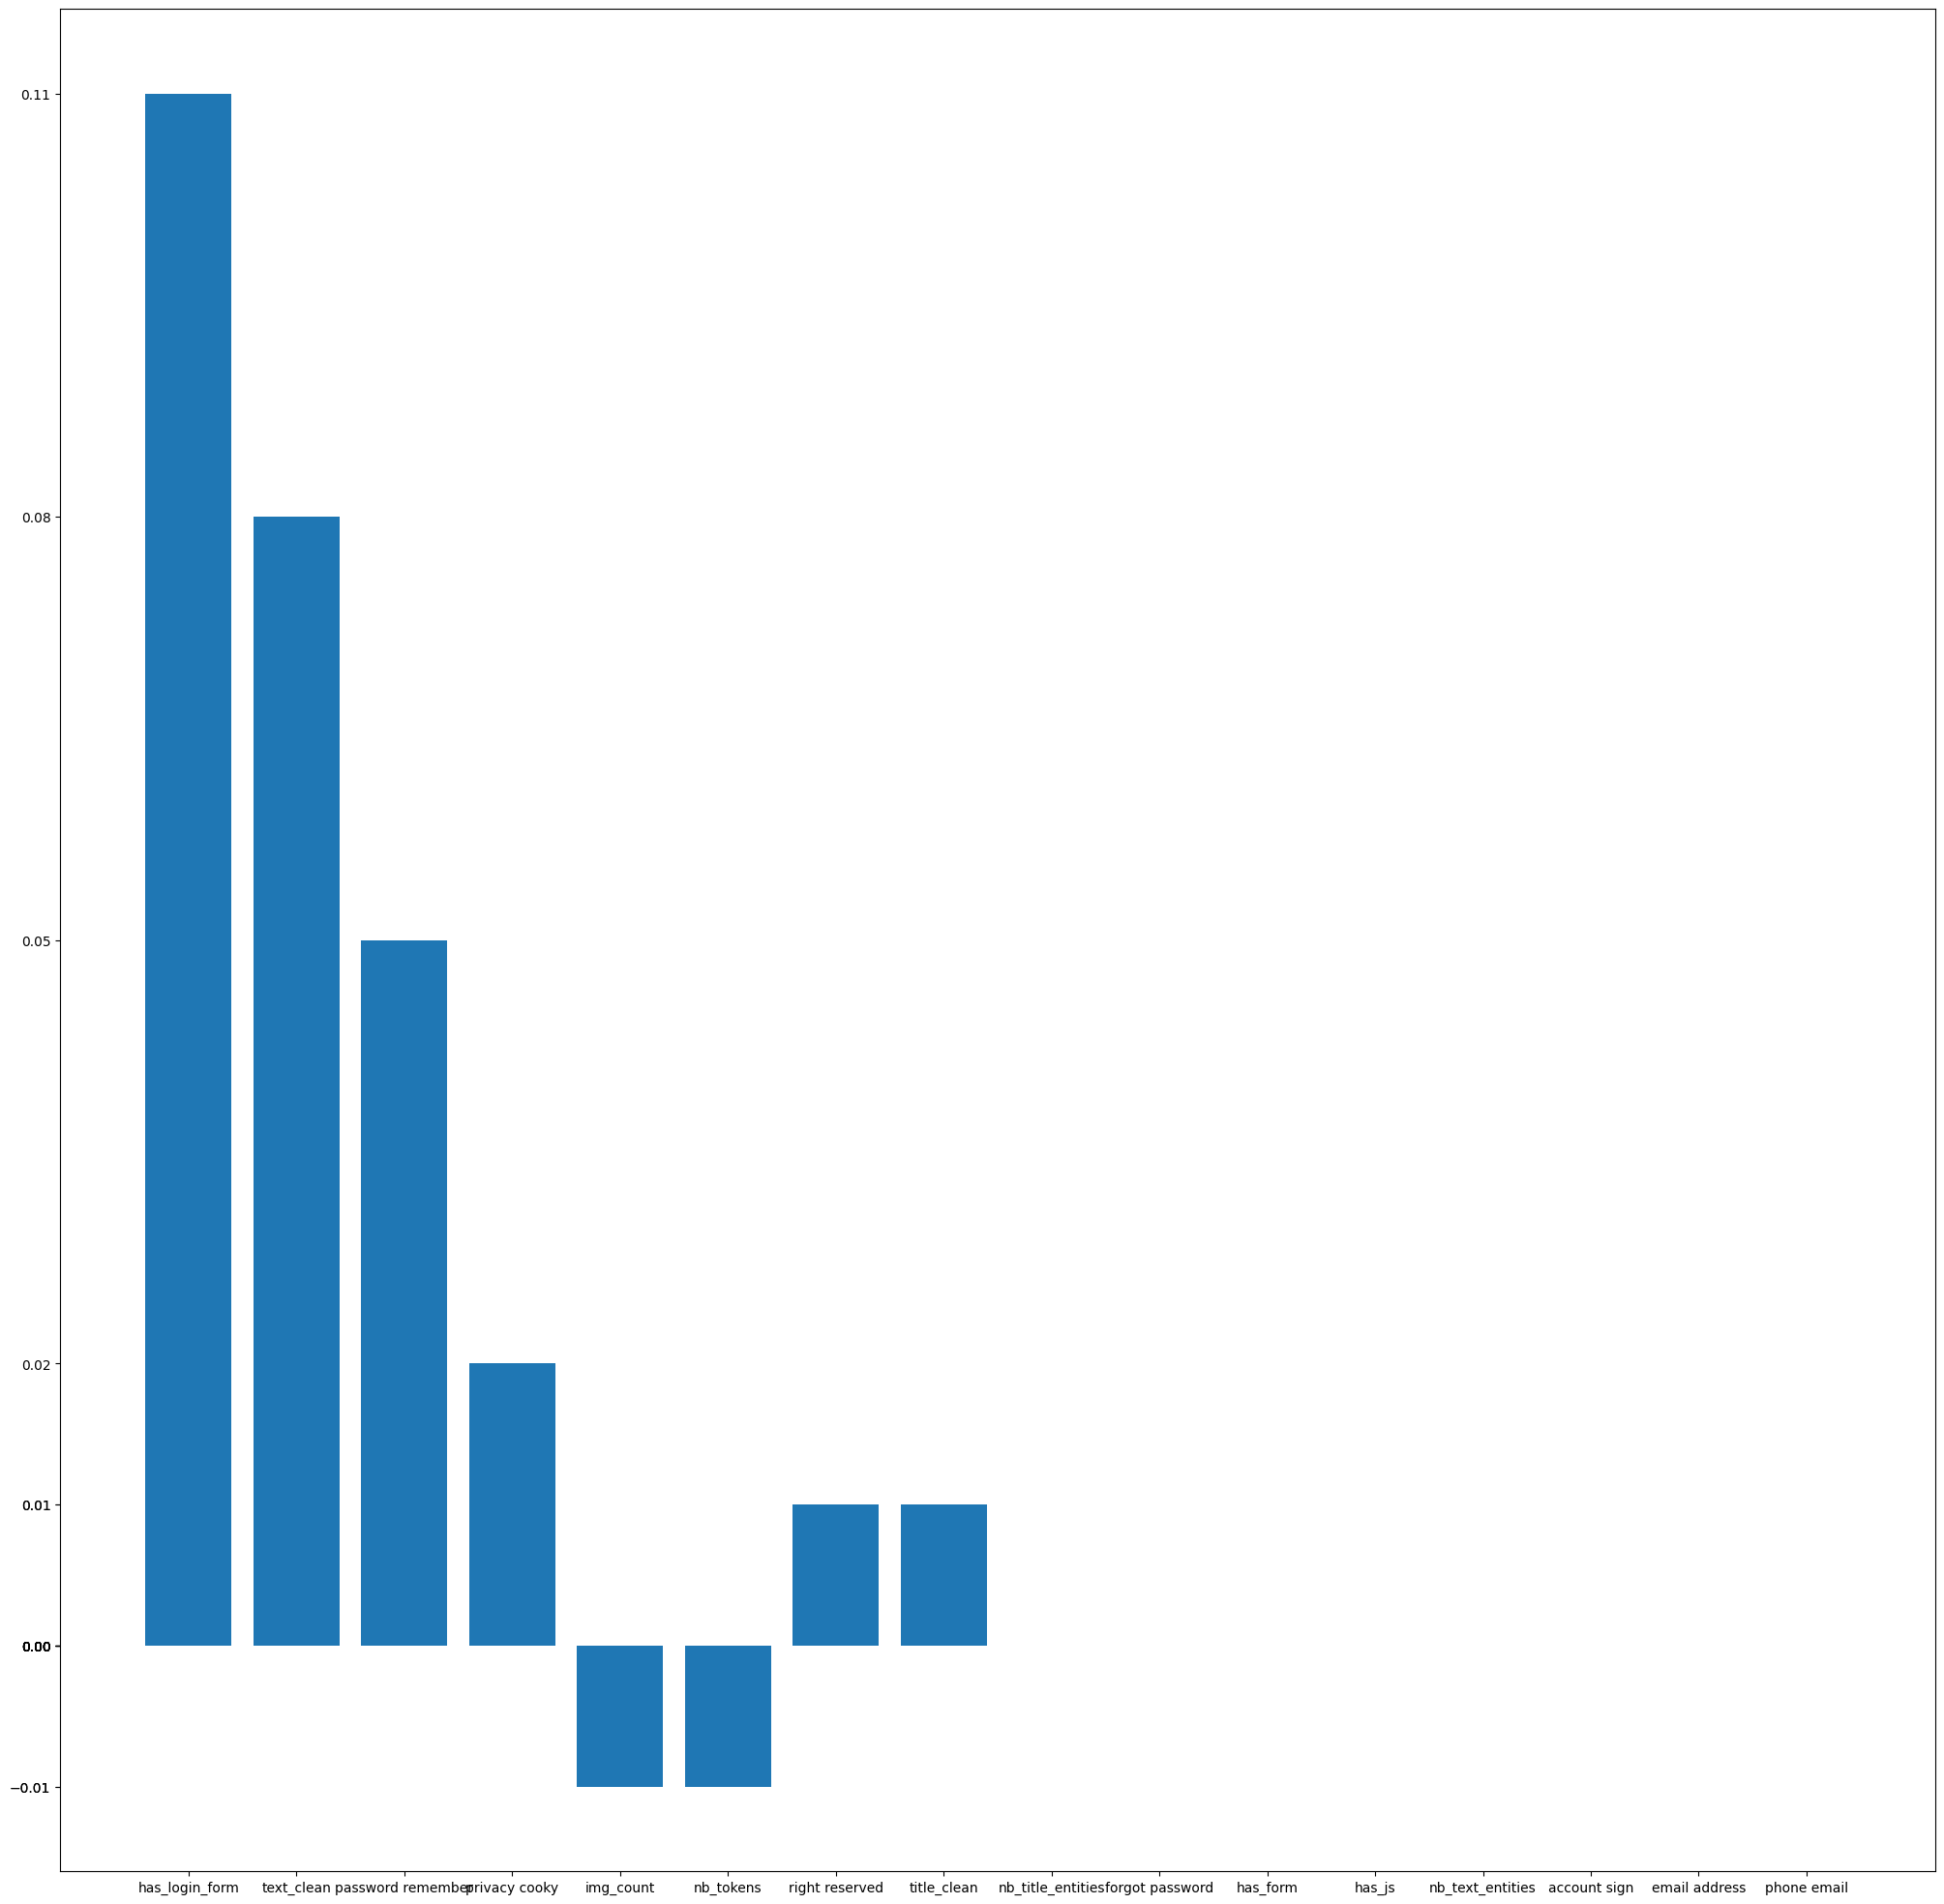

In [ ]:
import numpy as np                                                               
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 25, 25

rf_xs = np.arange(len(rf_labels)) 

plt.bar(rf_xs, rf_values, 0.8, align='center')

plt.xticks(rf_xs, rf_labels)
plt.yticks(rf_values)

plt.show()

In [ ]:
rf_contributions

array([[ 0.0054804 , -0.01291503,  0.        ,  0.10930412,  0.        ,
        -0.00823828,  0.07841759,  0.00082478,  0.        ,  0.        ,
         0.        ,  0.00037   ,  0.04506128,  0.        ,  0.02477737,
         0.00569741]])

In [ ]:
rf_prediction

array([[1.]])

In [ ]:
rf_bias

array([0.75122036])

In [ ]:
print(rf_bias + np.sum(rf_contributions, axis=1))

[1.]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=10)

In [ ]:
top50x = X_train.head(50)
top5x = X_train.head(5)
top50y = y_train.head(50)
top5y = y_train.head(5)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=10)
rf_model.fit(top50x, top50y)

RandomForestRegressor(n_estimators=10)

In [ ]:
estimator = rf_model.estimators_[5]

[Text(0.6, 0.875, 'password remember <= 0.5\nsquared_error = 0.134\nsamples = 26\nvalue = 0.84'),
 Text(0.4, 0.625, 'nb_tokens <= 30.5\nsquared_error = 0.095\nsamples = 25\nvalue = 0.894'),
 Text(0.2, 0.375, 'squared_error = 0.0\nsamples = 18\nvalue = 1.0'),
 Text(0.6, 0.375, 'nb_text_entities <= 1.5\nsquared_error = 0.215\nsamples = 7\nvalue = 0.688'),
 Text(0.4, 0.125, 'squared_error = 0.0\nsamples = 3\nvalue = 0.0'),
 Text(0.8, 0.125, 'squared_error = 0.0\nsamples = 4\nvalue = 1.0'),
 Text(0.8, 0.625, 'squared_error = 0.0\nsamples = 1\nvalue = 0.0')]

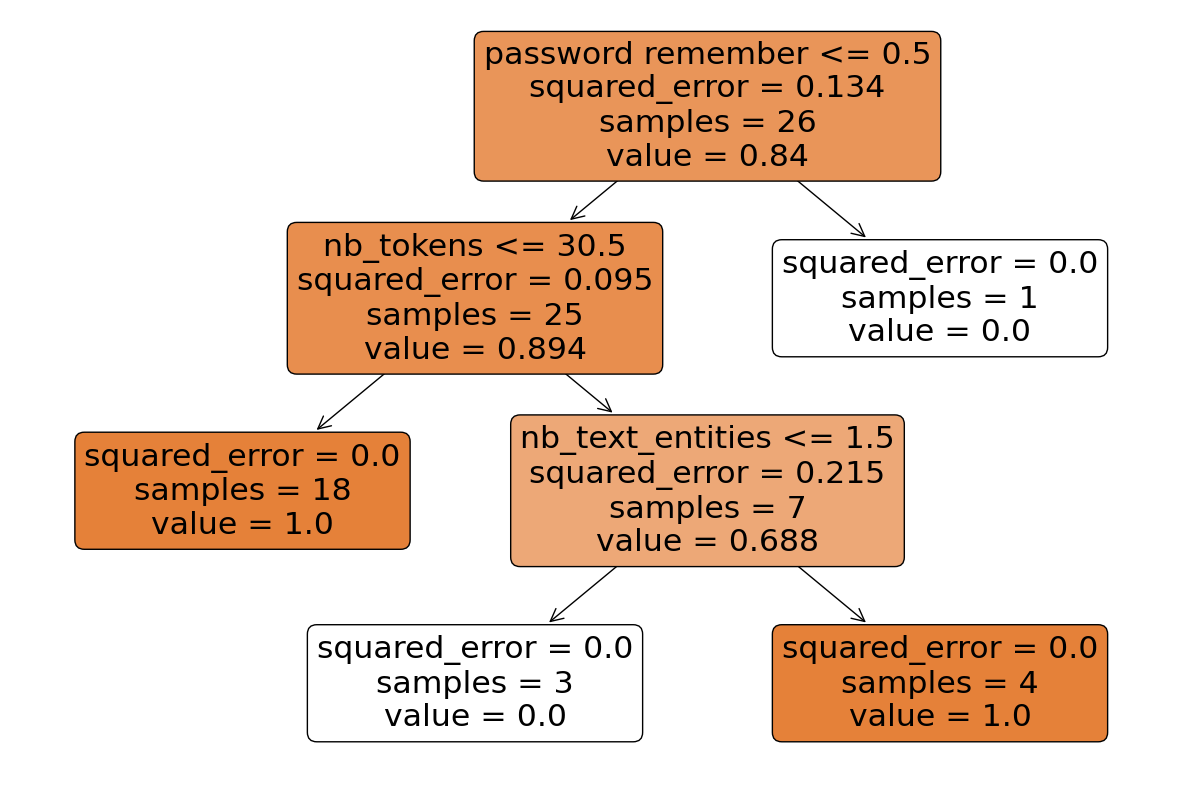

In [180]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(rf_model.estimators_[0], 
          feature_names=X.columns,
          class_names=y, 
          filled=True, impurity=True, 
          rounded=True)

Look at the graph for the top 5 rows

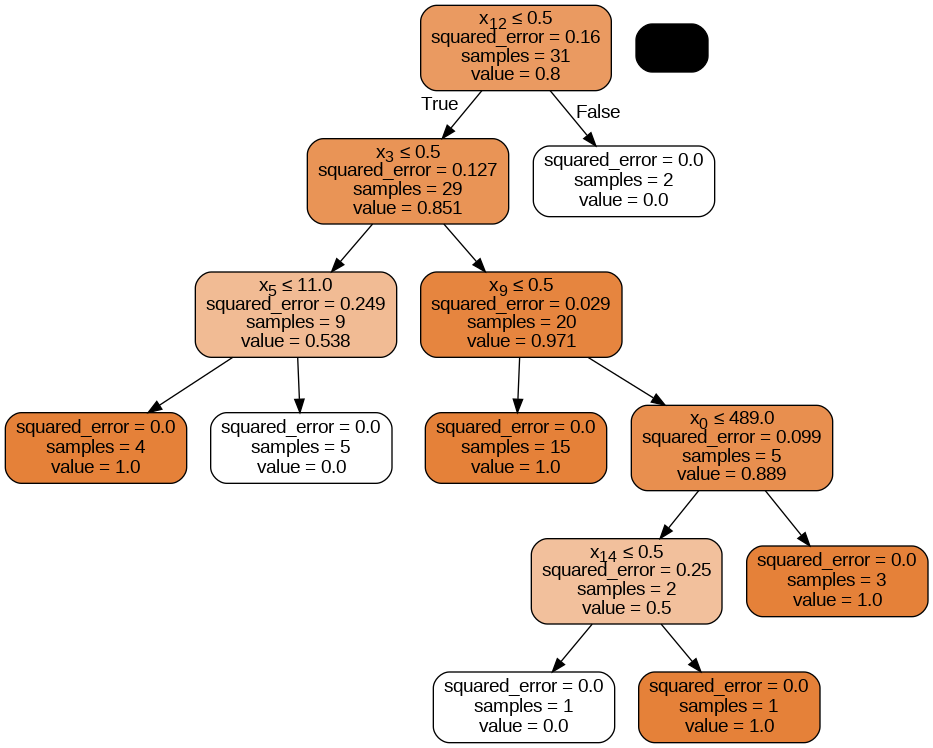

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
top50x

,title_clean,img_count,has_form,has_login_form,has_js,nb_tokens,text_clean,nb_title_entities,nb_text_entities,account sign,email address,forgot password,password remember,phone email,privacy cooky,right reserved
6044,216,1,1,1,1,31,1075,1.0,1.0,1,0,0,0,0,0,0
2543,631,1,1,0,1,10,2237,0.0,1.0,0,1,0,0,0,0,0
6811,824,1,1,0,1,57,1165,0.0,0.0,0,0,0,0,0,0,0
2279,1070,2,1,1,1,25,852,1.0,3.0,1,0,1,0,0,0,0
5145,691,3,1,1,1,61,550,1.0,6.0,0,0,1,0,0,0,0
5306,969,8,0,1,1,56,1273,0.0,7.0,0,1,0,0,0,0,0
3491,396,1,1,1,1,27,2320,0.0,0.0,0,0,0,0,0,0,0
728,1039,2,1,1,1,34,117,0.0,0.0,0,0,0,0,0,0,0
2081,308,3,1,1,0,56,2051,0.0,1.0,0,0,0,0,0,0,0
2103,349,3,1,1,1,18,11,0.0,1.0,0,0,1,0,0,1,0


In [ ]:
top50y

6044    0
2543    1
6811    0
2279    1
5145    1
5306    1
3491    1
728     1
2081    1
2103    1
3664    1
3724    1
1315    1
843     1
3551    1
405     1
414     1
1139    1
346     1
1564    1
5359    1
1570    1
1675    1
1670    1
2152    1
3055    1
1715    1
66      1
1692    1
5626    0
6729    0
6457    0
5867    0
413     1
914     1
1330    1
4101    1
5007    1
3740    1
5468    0
5344    1
2531    1
7085    0
1982    1
5069    1
1748    1
2425    1
3010    1
3931    1
6455    0
Name: classification, dtype: int64